In [1]:
%matplotlib widget

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", style="ticks", palette="husl", color_codes=True)

from astropy.io import fits
from astropy.table import Table

from lvmdrp.core import image
from lvmdrp.core import rss
from lvmdrp.functions import rssMethod

In [2]:
# TODO:
# read fiberflat table
# match fiberflat table with analyzed flats
# map wavelength solution from arcs

In [3]:
# for label in fiberflat_list:
#     ccd = label.split("-")[2]
#     arc_name = CHANNEL_ARC[ccd]

#     rssMethod.createPixTable_drp(
#         rss_in=f"{fiberflat_path}/{label}.ms.fits",
#         rss_out=f"{fiberflat_path}/{label}.rss.fits",
#         arc_wave=f"_data-lvm/{arc_name}.disp.fits",
#         arc_fwhm=f"_data-lvm/{arc_name}.res.fits",
#         cropping=''
#     )
#     try:
#         rssMethod.resampleWave_drp(
#             rss_in=f"{fiberflat_path}/{label}.rss.fits",
#             rss_out=f"{fiberflat_path}/{label}.disp_cor.fits",
#             start_wave=CHANNEL_WL[ccd][0], end_wave=CHANNEL_WL[ccd][1], disp_pix="1.0", err_sim="0", method="linear", parallel=0
#         )
#     except IndexError:
#         continue

In [4]:
# from astropy.visualization import ImageNormalize, LogStretch, SinhStretch, SquaredStretch, SqrtStretch


# fiberflat1_path = os.path.join("_data-lvm", "fiberflats-spec1", "sdR-s-z1-00002189.pre.fits")
# fiberflat3_path = os.path.join("_data-lvm", "fiberflats-spec3", "sdR-s-z3-00006786.pre.fits")
# # fiberflat1_path = "data.sdss5.org/sas/sdsswork/data/lvm/lab/59646/sdR-s-z1-00002189.fits.gz"
# # fiberflat3_path = ""

# image1 = image.loadImage(fiberflat1_path)
# image3 = image.loadImage(fiberflat3_path)

# data = np.abs(image1._data - image3._data)
# norm = ImageNormalize(data, stretch=LogStretch())

# fig = plt.figure(figsize=(10,10))
# plt.imshow(data, origin="lower", cmap="rainbow", norm=norm)
# plt.colorbar()
# plt.tight_layout()

In [5]:
CHANNEL = "z3"
WAVE_SN = {"weird feature": (3774, 3784), "valley": (1700, 1720)}
IFIBER = 20

weird feature
242.93082 365.16672
valley
123.66378 120.91453


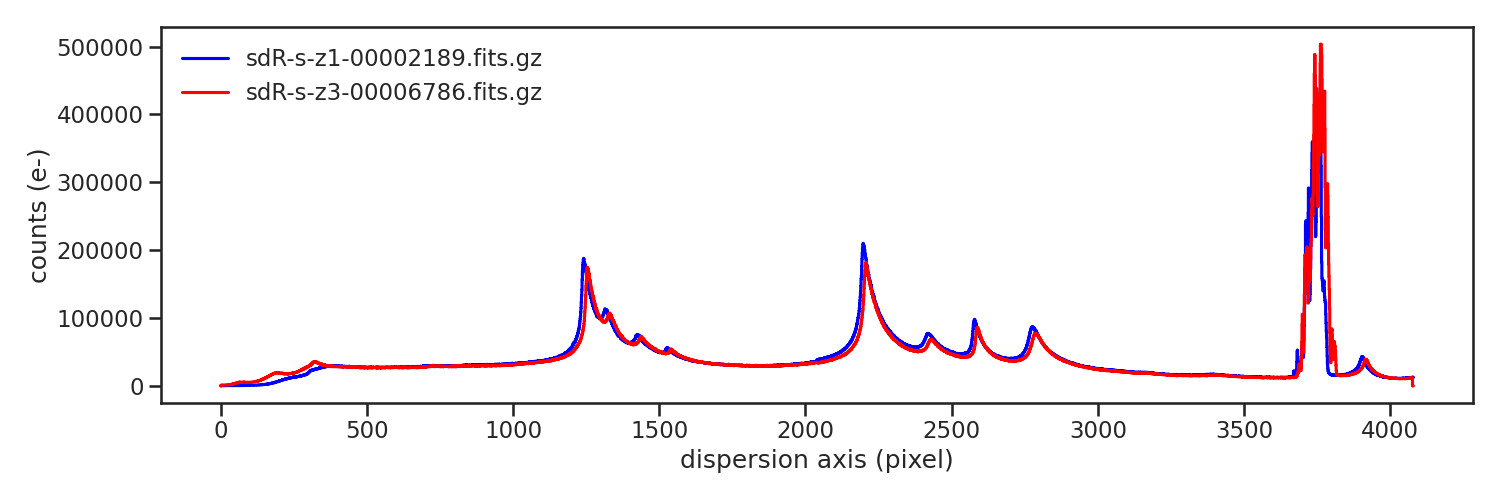

In [6]:
fiberflat1_path = os.path.join("_data-lvm", "fiberflats-spec1", "sdR-s-z1-00002189.ms.fits")
fiberflat3_path = os.path.join("_data-lvm", "fiberflats-spec3", "sdR-s-z3-00006786.ms.fits")
# fiberflat3_path = os.path.join("_data-lvm", "fiberflats-spec3", "sdR-s-z3-00006802.ms.fits")

fiberflat1 = rss.loadRSS(fiberflat1_path)
fiberflat3 = rss.loadRSS(fiberflat3_path)

spec1, error1, mask1 = fiberflat1.getSlice(IFIBER)
spec3, error3, mask3 = fiberflat3.getSlice(IFIBER)

wave1, wave3 = np.arange(spec1.size, dtype=int), np.arange(spec3.size, dtype=int)

for feature, (iwl, fwl) in WAVE_SN.items():
    mask_wl1 = (iwl<=wave1) & (wave1<=fwl)
    mask_wl3 = (iwl<=wave3) & (wave3<=fwl)

    snr1 = np.median(spec1[mask_wl1] / error1[mask_wl1])
    snr3 = np.median(spec3[mask_wl3] / error3[mask_wl3])
    print(feature)
    print(snr1, snr3)


fig = plt.figure(figsize=(15,5))
plt.step(wave1, spec1, color="blue", label=f"{fiberflat1.getHdrValue('FILENAME')}")
plt.step(wave3, spec3, color="red", label=f"{fiberflat3.getHdrValue('FILENAME')}")
plt.xlabel("dispersion axis (pixel)")
plt.ylabel("counts (e-)")
# plt.ylabel("S/N")
plt.legend(loc=0, frameon=False)
plt.tight_layout()

weird feature
242.93082 365.16672
valley
123.66378 120.91453


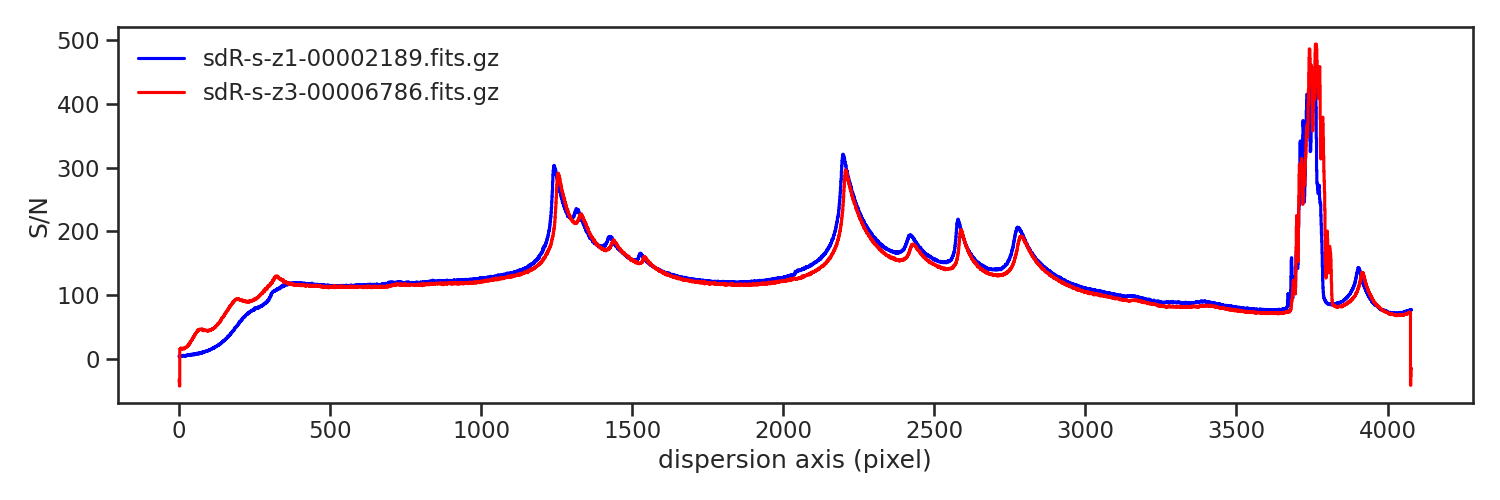

In [7]:
fiberflat1_path = os.path.join("_data-lvm", "fiberflats-spec1", "sdR-s-z1-00002189.ms.fits")
fiberflat3_path = os.path.join("_data-lvm", "fiberflats-spec3", "sdR-s-z3-00006786.ms.fits")
# fiberflat3_path = os.path.join("_data-lvm", "fiberflats-spec3", "sdR-s-z3-00006802.ms.fits")

fiberflat1 = rss.loadRSS(fiberflat1_path)
fiberflat3 = rss.loadRSS(fiberflat3_path)

spec1, error1, mask1 = fiberflat1.getSlice(IFIBER)
spec3, error3, mask3 = fiberflat3.getSlice(IFIBER)

wave1, wave3 = np.arange(spec1.size, dtype=int), np.arange(spec3.size, dtype=int)

for feature, (iwl, fwl) in WAVE_SN.items():
    mask_wl1 = (iwl<=wave1) & (wave1<=fwl)
    mask_wl3 = (iwl<=wave3) & (wave3<=fwl)

    snr1 = np.median(spec1[mask_wl1] / error1[mask_wl1])
    snr3 = np.median(spec3[mask_wl3] / error3[mask_wl3])
    print(feature)
    print(snr1, snr3)


fig = plt.figure(figsize=(15,5))
plt.step(wave1, spec1 / error1, color="blue", label=f"{fiberflat1.getHdrValue('FILENAME')}")
plt.step(wave3, spec3 / error3, color="red", label=f"{fiberflat3.getHdrValue('FILENAME')}")
plt.xlabel("dispersion axis (pixel)")
# plt.ylabel("counts (e-)")
plt.ylabel("S/N")
plt.legend(loc=0, frameon=False)
plt.tight_layout()

In [8]:
# define target channel
# define wavelength ranges

# for each fiberflat
#   check is a fiberflat
#   select spec channel
#   extract exposure time
#   extract spec and error
#   calculate wavelength masks
#   calculate S/N
# plot S/N vs exptime

fiberflat1_path = "_data-lvm/fiberflats-spec1"
fiberflat1_list = [path.replace(".ms.fits", "") for path in os.listdir(fiberflat1_path) if path.endswith(".ms.fits")]
fiberflat3_path = "_data-lvm/fiberflats-spec3"
fiberflat3_list = [path.replace(".ms.fits", "") for path in os.listdir(fiberflat3_path) if path.endswith(".ms.fits")]


labels1 = []
exptimes1 = []
temps1 = []
snr1 = {feature: [] for feature in WAVE_SN}
for ifiber, label in enumerate(fiberflat1_list):
    file_path = os.path.join(fiberflat1_path, f"{label}.ms.fits")
    header = fits.getheader(file_path)
    if header["IMAGETYP"] != "object": continue
    if header["CCD"] != "z1": continue

    labels1.append(label)
    exptimes1.append(header["EXPTIME"])
    temps1.append(header["CCDTEMP1"])

    fiberflat = rss.loadRSS(file_path)
    spec, error, mask = fiberflat.getSlice(IFIBER)
    wave = np.arange(spec.size, dtype=int)
    for feature, (iwl, fwl) in WAVE_SN.items():
        mask_wl = (iwl <= wave) & (wave <= fwl)
        sn = np.median(spec[mask_wl] / error[mask_wl])
        snr1[feature].append(sn)


labels3 = []
exptimes3 = []
temps3 = []
snr3 = {feature: [] for feature in WAVE_SN}
for ifiber, label in enumerate(fiberflat3_list):
    file_path = os.path.join(fiberflat3_path, f"{label}.ms.fits")
    header = fits.getheader(file_path)
    if header["IMAGETYP"] != "object": continue
    if header["CCD"] != CHANNEL: continue

    labels3.append(label)
    exptimes3.append(header["EXPTIME"])
    temps3.append(header["CCDTEMP1"])

    fiberflat = rss.loadRSS(file_path)
    spec, error, mask = fiberflat.getSlice(IFIBER)
    wave = np.arange(spec.size, dtype=int)
    for feature, (iwl, fwl) in WAVE_SN.items():
        mask_wl = (iwl <= wave) & (wave <= fwl)
        sn = np.median(spec[mask_wl] / error[mask_wl])
        snr3[feature].append(sn)

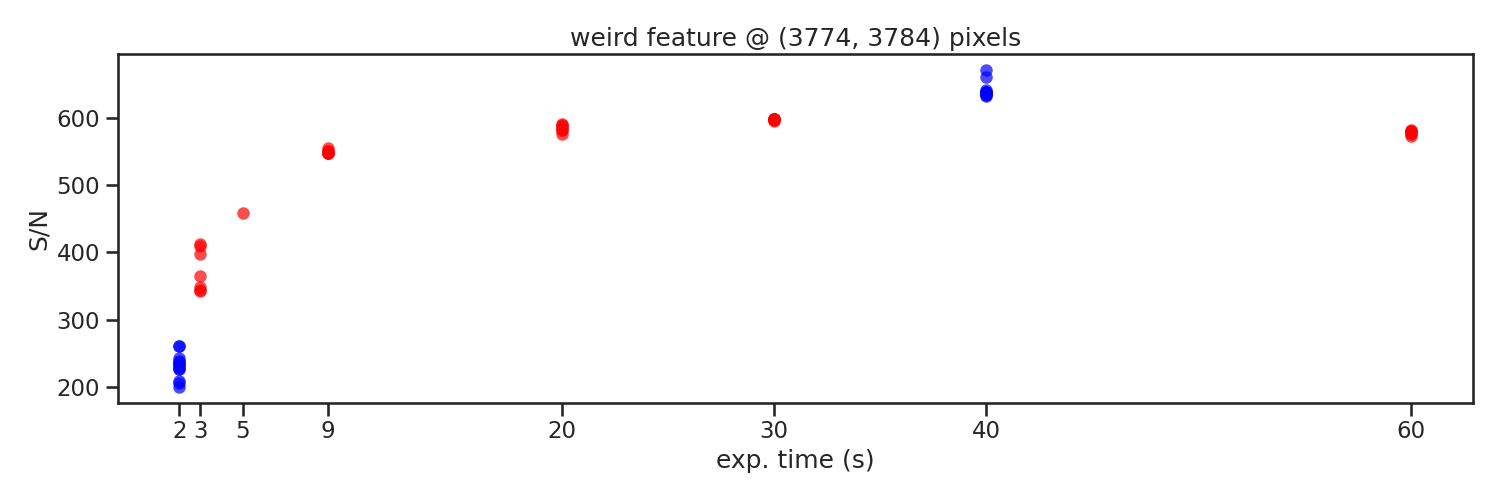

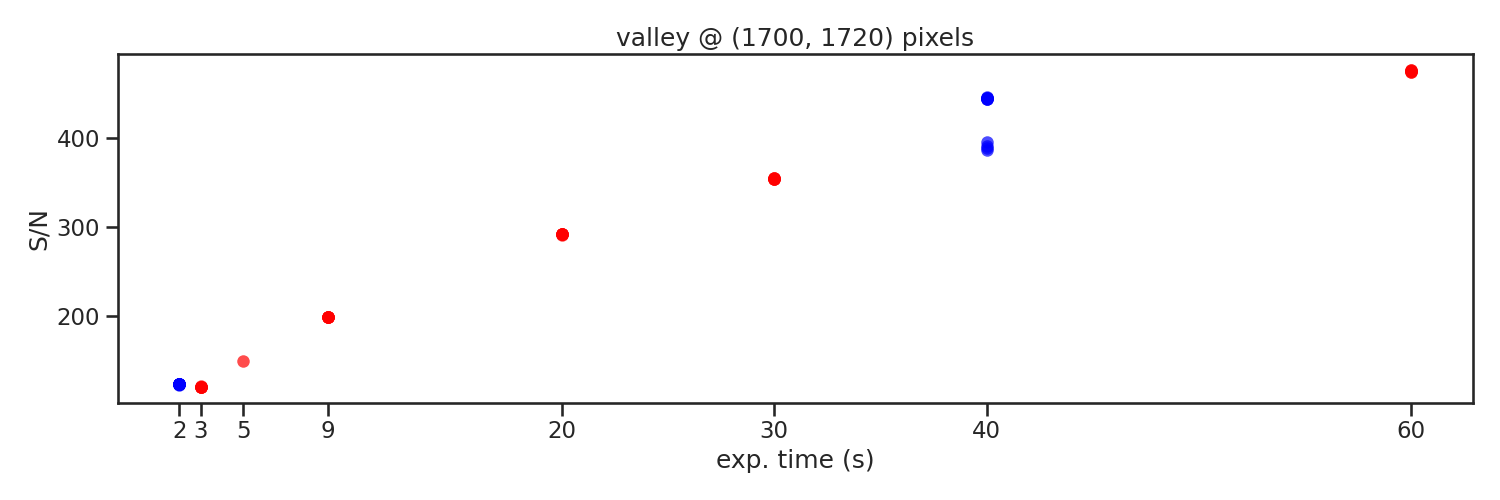

In [9]:
for feature in WAVE_SN:
    fig, ax = plt.subplots(figsize=(15, 5))

    sc = ax.scatter(exptimes1, snr1[feature], lw=0, alpha=0.7, c="blue")
    sc = ax.scatter(exptimes3, snr3[feature], lw=0, alpha=0.7, c="red")
    # cb = plt.colorbar(sc)
    # cb.set_label("CCD temp. (K)")

    ax.set_title(f"{feature} @ {WAVE_SN[feature]} pixels")
    ax.set_xlabel("exp. time (s)")
    ax.set_ylabel(f"S/N")
    ax.set_xticks(np.unique(exptimes1 + exptimes3))
    fig.tight_layout()


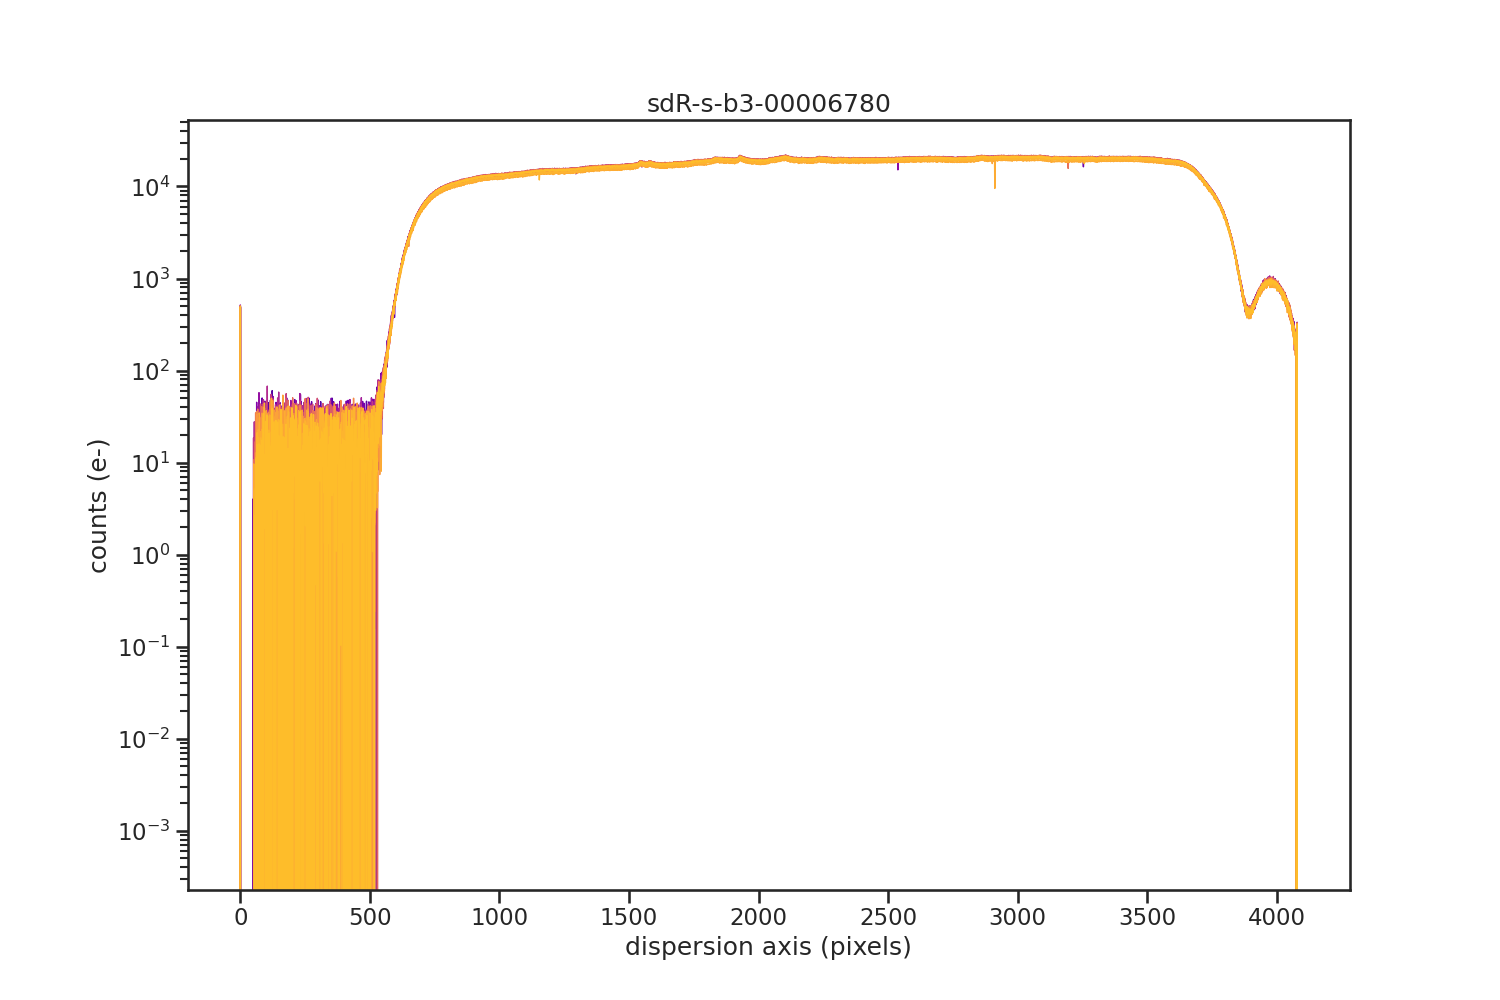

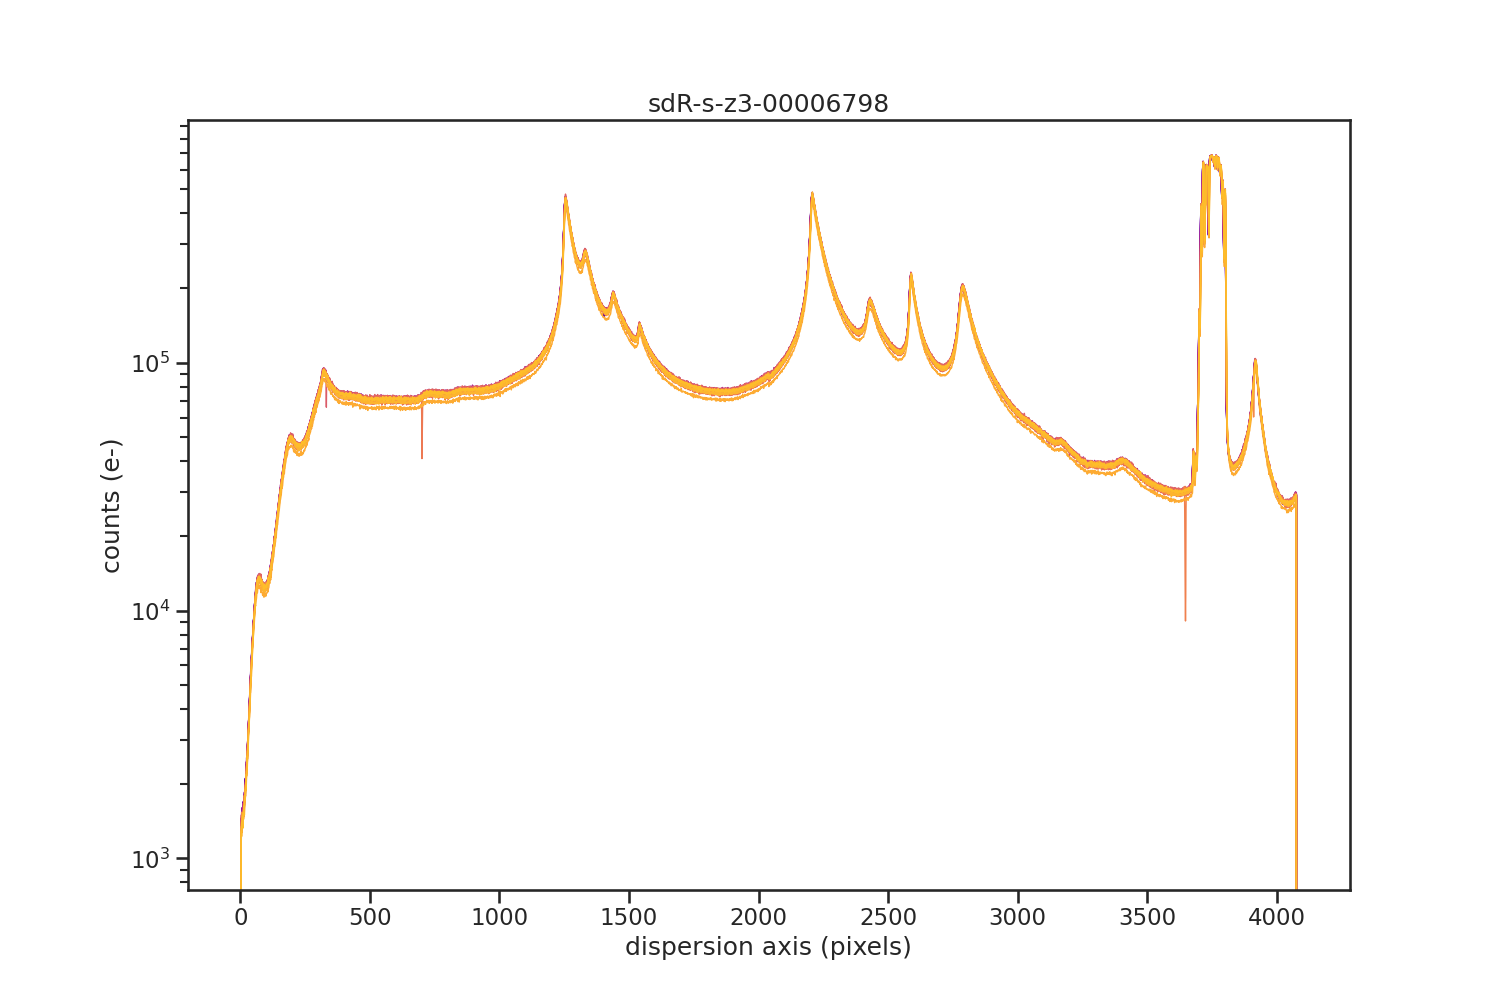

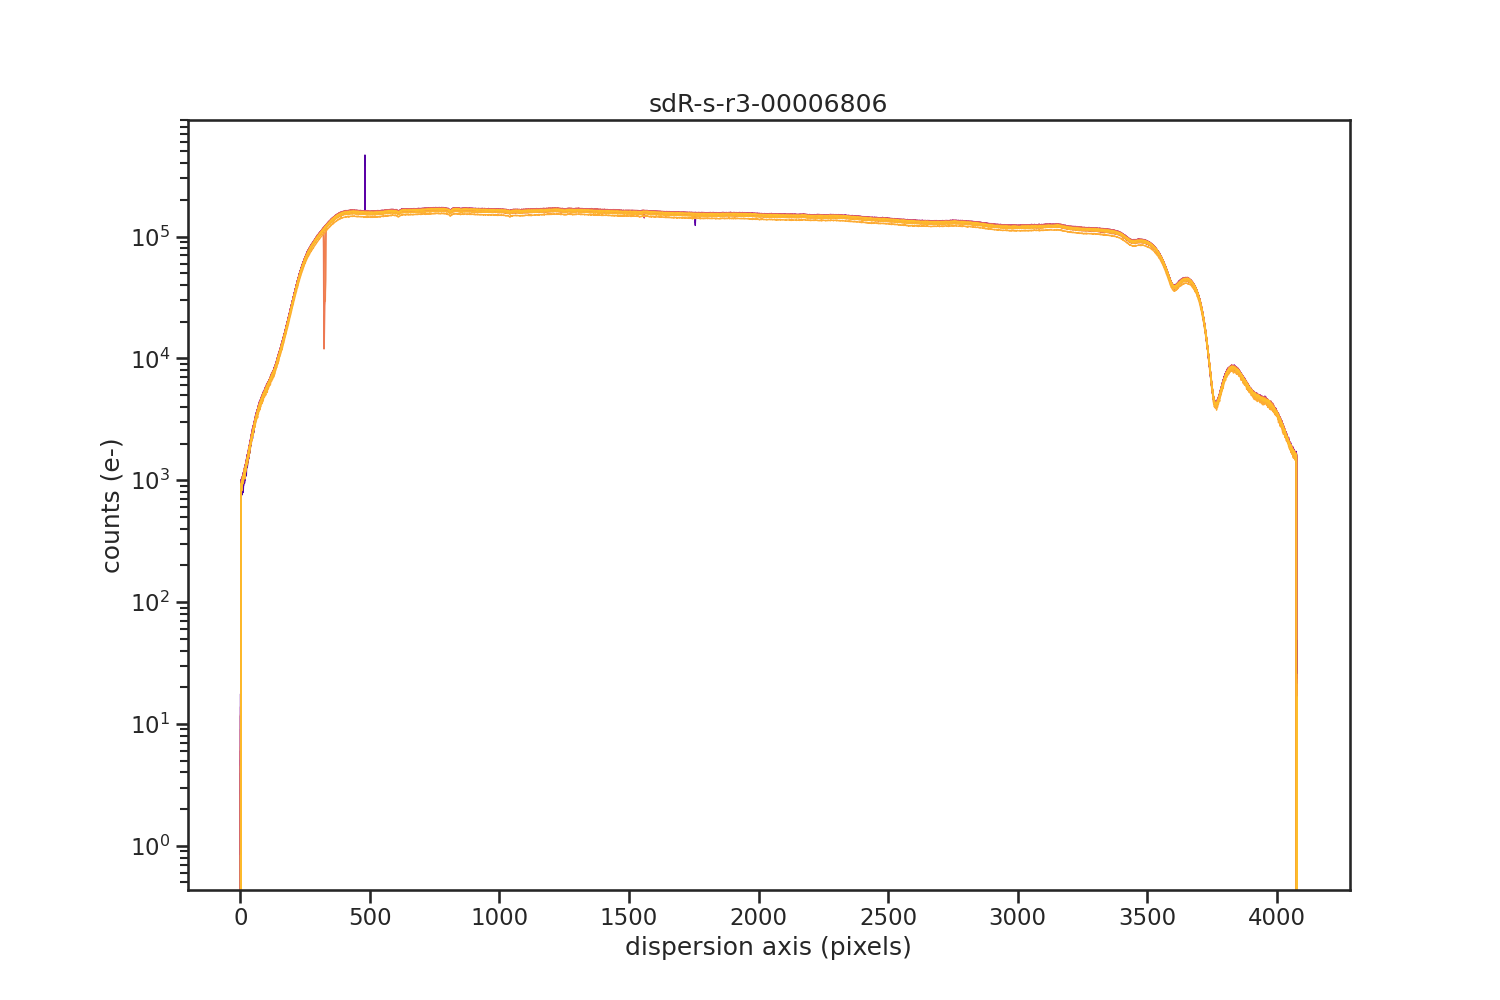

In [10]:
iflats = [14, 1, 11]
itrim = 5
jtrim = 10

for iflat in iflats:
    label = fiberflat3_list[iflat]
    ccd = label.split("-")[2]
    fiberflat = rss.loadRSS(f"{fiberflat3_path}/{label}.ms.fits")

    # fiberflat_med = np.median(fiberflat._data[itrim:-itrim], axis=0)
    # fiberflat._data = fiberflat._data / fiberflat_med
    # fiberflat = fiberflat.createFiberFlat(smooth_poly=-2)

    fig, ax = plt.subplots(figsize=(15,10))
    # ax.set_yscale("log")
    colors = sns.color_palette("plasma", fiberflat._fibers)
    for ifiber in range(itrim,fiberflat._fibers-itrim):
        spec, error, mask = fiberflat.getSlice(ifiber, axis="x")
        ax.semilogy(spec[~mask], color=colors[ifiber], lw=1)
    ax.set_xlabel("dispersion axis (pixels)")
    ax.set_ylabel("counts (e-)")
    ax.set_title(label)
    # fig.savefig(f"continuum-{ccd}.png", bbox_inches="tight")